# 1. Import Libraries

In [1]:
# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os

import warnings

# 2. Read and Explain Dataset

In [2]:
# Đọc dữ liệu
df_risk = pd.read_csv("G:\\Loan Data Analysis\\data\\credit_risk_dataset_2.csv")
df_risk.head(10)     

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
0                  RENT    PERSONAL          D                         Y   
1                   OWN   EDUCATION          B                         N   
2              MORTGAGE     MEDICAL          C                         N   
3                  RENT     MEDICAL          C                         N   
4                  RENT     MEDICAL          C                         Y   
5                   OWN     VENTURE          A                         N   
6                  RENT   EDUCATION          B                         N   
7                  RENT     MEDICAL          B                         N   
8                  RENT    PERSONAL          A                         N   
9                   OWN     VENTURE          D                         N   

   person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
0          59000          22              123.0      35000          16.02   
1           9600          21                5.0       1000          11.14   
2           9600          25                1.0       5500          12.87   
3          65500          23                4.0      35000          15.23   
4          54400          24                8.0      35000          14.27   
5           9900          21                2.0       2500           7.14   
6          77100          26                8.0      35000          12.42   
7          78956          24                5.0      35000          11.11   
8          83000          24                8.0      35000           8.90   
9          10000          21                6.0       1600          14.74   

   cb_person_cred_hist_length  loan_percent_income  loan_status  
0                           3                 0.59            1  
1                           0                 0.10            0  
2                           0                 0.57            1  
3                           0                 0.53            1  
4                           4                 0.55            1  
5                           0                 0.25            1  
6                           0                 0.45            1  
7                           0                 0.44            1  
8                           0                 0.42            1  
9                           0                 0.16            1

In [3]:
df_risk.sample(10)

person_home_ownership        loan_intent loan_grade  \
9091               MORTGAGE          EDUCATION          A   
26835              MORTGAGE    HOMEIMPROVEMENT          A   
3854                   RENT    HOMEIMPROVEMENT          D   
31426              MORTGAGE  DEBTCONSOLIDATION          A   
11426                  RENT  DEBTCONSOLIDATION          D   
25562              MORTGAGE    HOMEIMPROVEMENT          D   
24006                  RENT           PERSONAL          D   
5016                   RENT           PERSONAL          B   
6956                    OWN            VENTURE          B   
22344                  RENT            MEDICAL          C   

      cb_person_default_on_file  person_income  person_age  person_emp_length  \
9091                          N          60000          23                7.0   
26835                         N         115000          32                0.0   
3854                          Y          29000          25                1.0   
31426                         N          95000          49               12.0   
11426                         N          54000          24                1.0   
25562                         N          86004          27                8.0   
24006                         N          34000          28                4.0   
5016                          N          45000          22                3.0   
6956                          N          50400          26                0.0   
22344                         Y          34000          27                7.0   

       loan_amnt  loan_int_rate  cb_person_cred_hist_length  \
9091       10750           7.88                           0   
26835       7200           7.90                           0   
3854        4000          14.54                           3   
31426       7500           6.03                           0   
11426      10000          14.11                           0   
25562      16000          14.42                           0   
24006      10000          14.74                           0   
5016        5000          11.11                           0   
6956        6725          10.62                           0   
22344       7000          15.96                          10   

       loan_percent_income  loan_status  
9091                  0.18            0  
26835                 0.06            0  
3854                  0.14            1  
31426                 0.08            0  
11426                 0.19            1  
25562                 0.19            0  
24006                 0.29            0  
5016                  0.11            0  
6956                  0.13            0  
22344                 0.21            0

## Mô tả các đặc trưng

<div>
    <ul>
        <li><b>person_age:</b> Tuổi của người đăng ký vay.</li>
        <li><b>person_income:</b> Thu nhập hàng năm của cá nhân.</li>
        <li><b>person_home_ownership:</b>  Loại hình sở hữu nhà của cá nhân.
            <ul>
                <li>rent: Cá nhân đang thuê nhà.</li>
                <li>mortgage: Cá nhân đang thế chấp bất động sản họ sở hữu.</li>
                <li>own:  Cá nhân sở hữu hoàn toàn ngôi nhà của họ.</li>
                <li>other: Các hình thức sở hữu nhà khác có thể đặc thù cho bộ dữ liệu.</li>
            </ul>
        </li>
        <li><b>person_emp_length:</b> Thời gian làm việc của cá nhân tính bằng năm.</li>
        <li><b>loan_intent:</b> Mục đích của khoản vay.</li>
        <li><b>loan_grade:</b> Xếp hạng được gán cho khoản vay dựa trên khả năng tín dụng của người vay.
            <ul>
                <li>A: Người vay có khả năng tín dụng cao, chỉ ra rủi ro thấp.</li>
                <li>B: Người vay có rủi ro tương đối thấp, nhưng không đáng tin cậy bằng Hạng A.</li>
                <li>C: Khả năng tín dụng của người vay ở mức trung bình.</li>
                <li>D: Người vay được coi là có rủi ro cao hơn so với các hạng trước.</li>
                <li>E: Khả năng tín dụng của người vay thấp hơn, chỉ ra rủi ro cao hơn.</li>
                <li>F: Người vay có rủi ro tín dụng đáng kể.</li>
                <li>G: Khả năng tín dụng của người vay là thấp nhất, biểu thị rủi ro cao nhất.</li>
            </ul>
        </li>
        <li><b>loan_amnt:</b> Số tiền vay mà cá nhân yêu cầu.</li>
        <li><b>loan_int_rate:</b> Lãi suất liên quan đến khoản vay.</li>
        <li><b>loan_status:</b> Trạng thái khoản vay, trong đó 0 chỉ không vỡ nợ và 1 chỉ vỡ nợ.
            <ul>
                <li>0: Không vỡ nợ - Người vay đã trả nợ thành công theo thỏa thuận và không có vỡ nợ.</li>
                <li>1: Vỡ nợ - Người vay không trả được nợ theo các điều khoản đã thỏa thuận và đã vỡ nợ.</li>
            </ul>
        </li>
        <li><b>loan_percent_income:</b>  Tỷ lệ thu nhập của cá nhân được phân bổ để trả nợ.</li>
        <li><b>cb_person_default_on_file:</b> Lịch sử vỡ nợ của cá nhân theo hồ sơ của cục tín dụng.
            <ul>
                <li>Y: Cá nhân có lịch sử vỡ nợ trong hồ sơ tín dụng của họ.</li>
                <li>N: Cá nhân không có bất kỳ lịch sử vỡ nợ nào.</li>
            </ul>
        </li>
        <li><b>cb_preson_cred_hist_length:</b> Độ dài lịch sử tín dụng của cá nhân.</li>
    </ul>
</div>


In [4]:
df_risk.shape

(32581, 12)

In [5]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       32581 non-null  object 
 1   loan_intent                 32581 non-null  object 
 2   loan_grade                  32581 non-null  object 
 3   cb_person_default_on_file   32581 non-null  object 
 4   person_income               32581 non-null  int64  
 5   person_age                  32581 non-null  int64  
 6   person_emp_length           31686 non-null  float64
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   cb_person_cred_hist_length  32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df_risk.describe()

person_income    person_age  person_emp_length     loan_amnt  \
count   3.258100e+04  32581.000000       31686.000000  32581.000000   
mean    6.607485e+04     27.719254           4.789686   9589.371106   
std     6.198312e+04      6.206590           4.142630   6322.086646   
min     4.000000e+03     20.000000           0.000000    500.000000   
25%     3.850000e+04     23.000000           2.000000   5000.000000   
50%     5.500000e+04     26.000000           4.000000   8000.000000   
75%     7.920000e+04     30.000000           7.000000  12200.000000   
max     6.000000e+06     94.000000         123.000000  35000.000000   

       loan_int_rate  cb_person_cred_hist_length  loan_percent_income  \
count   29465.000000                32581.000000         32581.000000   
mean       11.011695                    1.030509             0.170203   
std         3.240459                    2.806561             0.106782   
min         5.420000                    0.000000             0.000000   
25%         7.900000                    0.000000             0.090000   
50%        10.990000                    0.000000             0.150000   
75%        13.470000                    0.000000             0.230000   
max        23.220000                   30.000000             0.830000   

        loan_status  
count  32581.000000  
mean       0.218164  
std        0.413006  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
df_risk.count()

person_home_ownership         32581
loan_intent                   32581
loan_grade                    32581
cb_person_default_on_file     32581
person_income                 32581
person_age                    32581
person_emp_length             31686
loan_amnt                     32581
loan_int_rate                 29465
cb_person_cred_hist_length    32581
loan_percent_income           32581
loan_status                   32581
dtype: int64

In [8]:
# kiểm tra và hiển thị số lượng giá trị null 
df_risk.isnull().sum()[df_risk.isnull().sum() > 0]

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [9]:
# Đếm số lượng giá trị duy nhất (không trùng lặp) trong mỗi cột của DataFrame.
df_risk.nunique()

person_home_ownership            4
loan_intent                      6
loan_grade                       7
cb_person_default_on_file        2
person_income                 4295
person_age                      56
person_emp_length               36
loan_amnt                      753
loan_int_rate                  348
cb_person_cred_hist_length      30
loan_percent_income             77
loan_status                      2
dtype: int64

In [10]:
df_risk["loan_status"].value_counts(normalize= True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [11]:
# Đếm số lượng hàng trùng lặp trong DataFrame
df_risk.duplicated().sum()

552

In [12]:
df_risk.drop_duplicates(inplace=True)

In [13]:
df_risk.shape

(32029, 12)

loan_status
0    25009
1     7020
Name: count, dtype: int64


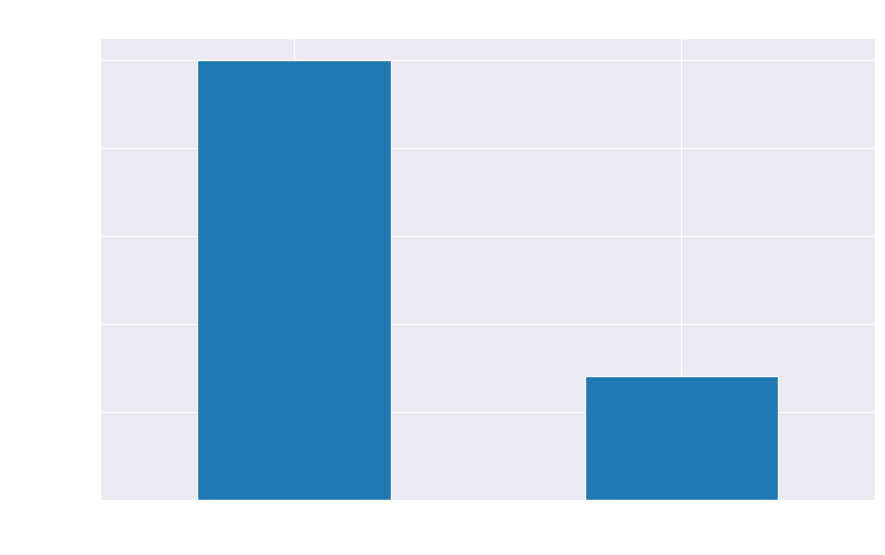

In [14]:
# Thống kê khoản vay có hoàn trả không
# 0: Không vỡ nợ - Người vay đã trả nợ thành công theo thỏa thuận và không có vỡ nợ.
# 1: Vỡ nợ - Người vay không trả được nợ theo các điều khoản đã thỏa thuận và đã vỡ nợ.

import matplotlib.pyplot as plt

print(df_risk["loan_status"].value_counts())

plt.figure(figsize=(10, 6))
ax = df_risk["loan_status"].value_counts().plot(kind="bar")

# Đổi màu chữ trên trục x và y thành trắng
plt.xticks(color='white')
plt.yticks(color='white')

# Thêm nhãn cho trục và tiêu đề (tùy chọn)
plt.xlabel('Trạng thái khoản vay', color='white')
plt.ylabel('Số lượng', color='white')
plt.title('Thống kê trạng thái khoản vay', color='white')

plt.show()

# Imbalanced data -> xử lý sau trước khi train

### Định nghĩa các columns numerical and categorical 

In [15]:
# Tìm các field là Object/String
object_cols = [f for f in df_risk.columns if df_risk[f].dtype == "O"]
num_cols = [f for f in df_risk.columns if df_risk[f].dtype != "O"]
print(object_cols)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [16]:
# Xem mức độ tương quan dữ liệu của các đặc trưng
df_risk[num_cols].corr()

person_income  person_age  person_emp_length  \
person_income                    1.000000    0.126405           0.134245   
person_age                       0.126405    1.000000           0.166604   
person_emp_length                0.134245    0.166604           1.000000   
loan_amnt                        0.267089    0.051726           0.113383   
loan_int_rate                    0.002244    0.012586          -0.055743   
cb_person_cred_hist_length       0.026959    0.235933           0.012736   
loan_percent_income             -0.253772   -0.041809          -0.054467   
loan_status                     -0.144886   -0.020959          -0.083111   

                            loan_amnt  loan_int_rate  \
person_income                0.267089       0.002244   
person_age                   0.051726       0.012586   
person_emp_length            0.113383      -0.055743   
loan_amnt                    1.000000       0.147176   
loan_int_rate                0.147176       1.000000   
cb_person_cred_hist_length   0.044071       0.401613   
loan_percent_income          0.572308       0.119664   
loan_status                  0.105012       0.335988   

                            cb_person_cred_hist_length  loan_percent_income  \
person_income                                 0.026959            -0.253772   
person_age                                    0.235933            -0.041809   
person_emp_length                             0.012736            -0.054467   
loan_amnt                                     0.044071             0.572308   
loan_int_rate                                 0.401613             0.119664   
cb_person_cred_hist_length                    1.000000             0.020247   
loan_percent_income                           0.020247             1.000000   
loan_status                                   0.139130             0.378922   

                            loan_status  
person_income                 -0.144886  
person_age                    -0.020959  
person_emp_length             -0.083111  
loan_amnt                      0.105012  
loan_int_rate                  0.335988  
cb_person_cred_hist_length     0.139130  
loan_percent_income            0.378922  
loan_status                    1.000000

# 3. Exploratory Data Analysis (Khai phá dữ liệu)

Vì bài toán của chúng ta xây dựng ở đây là dự đoán ra việc có trả nợ thành công hay là không nên chúng ta cần đi sâu vào các đặc trưng quan thiết yếu của khách hàng như độ tuổi, thu nhập, số tiền vay mà cá nhân yêu cầu

### Phân tích phân khúc khách hàng dựa trên các feature

In [17]:
# Phân tích khách hàng dựa trên độ tuổi 

max_age = df_risk["person_age"].max()
min_age = df_risk["person_age"].min()

print(f"Độ tuổi cao nhất: {max_age}" + " tuổi")
print(f"Độ tuổi thấp nhất: {min_age}" + " tuổi")

# Người có độ tuổi từ x đến y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df_risk['person_age'].between(next,arr[i+1]).sum()
        print(f'Tuổi từ {next} đến {arr[i+1]}: Số lượng người: {num_people}')
        
age_group([19, 26, 36, 46, 56, 66, 76, 86, 96])


Độ tuổi cao nhất: 94 tuổi
Độ tuổi thấp nhất: 20 tuổi
Tuổi từ 20 đến 26: Số lượng người: 17518
Tuổi từ 27 đến 36: Số lượng người: 11649
Tuổi từ 37 đến 46: Số lượng người: 2326
Tuổi từ 47 đến 56: Số lượng người: 420
Tuổi từ 57 đến 66: Số lượng người: 96
Tuổi từ 67 đến 76: Số lượng người: 16
Tuổi từ 77 đến 86: Số lượng người: 3
Tuổi từ 87 đến 96: Số lượng người: 1


Phần lớn các cá nhân xin vay tiền là những người tương đối trẻ, với hơn 15.000 người nộp đơn trong độ tuổi từ 20 đến 26. Ngược lại, số lượng người nộp đơn giảm đáng kể khi tuổi tăng lên, với chỉ một vài người nộp đơn trong độ tuổi từ 77 đến 86 và không có ai trong độ tuổi từ 87 đến 96. Vì chỉ có bốn cá nhân trên 76 tuổi, sự hiện diện của họ có thể giới thiệu sự sai lệch vào tập dữ liệu. Do đó, sẽ là hợp lý nếu loại bỏ họ.

In [18]:
# Phân tích khách hàng dựa trên thu nhập

max_ = df_risk['person_income'].max()
min_ = df_risk['person_income'].min()

print(f"Thu nhập cao nhất: {max_}" + "$")
print(f"Thu nhập thấp nhất: {min_}" + "$")

# Người có thu nhập từ x đến y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df_risk['person_income'].between(next,arr[i+1]).sum()
        print(f'Thu nhập từ {next} đến {arr[i+1]}: Số lượng người: {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

Thu nhập cao nhất: 6000000$
Thu nhập thấp nhất: 4000$
Thu nhập từ 1 đến 25000: Số lượng người: 2426
Thu nhập từ 25001 đến 50000: Số lượng người: 11404
Thu nhập từ 50001 đến 75000: Số lượng người: 9465
Thu nhập từ 75001 đến 100000: Số lượng người: 4596
Thu nhập từ 100001 đến inf: Số lượng người: 4138


Phân bố thu nhập của những người xin vay cho thấy phần lớn có thu nhập từ $25,001 đến $50,000, với 11404 cá nhân nằm trong khoảng này. Số lượng người nộp đơn giảm dần khi thu nhập tăng, với ít người hơn có thu nhập dưới $25,000 và trên $75,000.

In [19]:
# Phân tích khách hàng dựa trên số tiền vay mà cá nhân yêu cầu
max_loan_amount = df_risk['loan_amnt'].max()
min_loan_amount = df_risk['loan_amnt'].min()

print(f"Số tiền vay tối đa: {max_loan_amount}" + "$")
print(f"Số tiền vay tối thiểu: {min_loan_amount}"+ "$")

# Người vay từ x đến y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df_risk['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Khoản vay từ {next} đến {arr[i+1]}: Số lượng người vay: {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

Số tiền vay tối đa: 35000$
Số tiền vay tối thiểu: 500$
Khoản vay từ 1 đến 5000: Số lượng người vay: 9329
Khoản vay từ 5001 đến 10000: Số lượng người vay: 11835
Khoản vay từ 10001 đến 15000: Số lượng người vay: 6008
Khoản vay từ 15001 đến inf: Số lượng người vay: 4857


Phân bố số tiền vay cho thấy một phần lớn các cá nhân xin vay từ $5,001 đến $10,000, với 11,835 cá nhân nằm trong khoảng này. Số lượng người nộp đơn giảm dần khi số tiền vay tăng vượt quá $10,000, với số tiền vay tối thiểu là $500 và số tiền vay tối đa là $35,000.

In [20]:
df_risk["person_home_ownership"].value_counts()

person_home_ownership
RENT        16194
MORTGAGE    13206
OWN          2524
OTHER         105
Name: count, dtype: int64

Phân bố tình trạng sở hữu nhà của các cá nhân cho thấy phần lớn (16,194 người) là người thuê nhà, tiếp theo là những người có thế chấp (13,206 người). Có ít ứng viên sở hữu nhà của mình (2,524 người), trong khi một số rất nhỏ (105 người) thuộc vào nhóm "Khác".

In [21]:
fig = px.imshow(round(df_risk[num_cols].corr(), 2), text_auto = True, color_continuous_scale='Blues')
fig.update_layout(width=1000, height=1000)  
fig.show()

In [21]:
# Pie chart of person_home_ownership

fig = px.pie(values = df_risk["person_home_ownership"].value_counts(),
             names = df_risk["person_home_ownership"].value_counts().index,
             color_discrete_sequence=px.colors.sequential.Blues_r,
             title = "Person Home Ownership",
             width=900, height=500)

fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=1)))
fig.show()

Phần lớn các cá nhân trong tập dữ liệu chiếm khoảng một nửa, sống trong các chỗ ở thuê thay vì sở hữu nhà riêng. Hơn nữa, hơn 40% cá nhân có nhà bị thế chấp.

In [22]:
# Pie chart of loan grade

fig = px.pie(values = df_risk["loan_grade"].value_counts(), names = df_risk["loan_grade"].value_counts().index, color_discrete_sequence=px.colors.sequential.Blues_r, title = "Loan Grade", width=900, height=500)

fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))
fig.show()

Phân phối điểm tín dụng nổi bật sự tập trung chủ yếu ở các điểm A và B, với lần lượt là 10,523 và 10,224 trường hợp, cho thấy hồ sơ rủi ro thấp hơn đối với các khoản vay này. Điểm C theo sát với 6,415 trường hợp. Khi các điểm giảm dần, số lượng các khoản vay giảm, cho thấy xu hướng giảm dần về chất lượng khoản vay. Các điểm D, E, F và G đại diện cho số lượng trường hợp ngày càng ít hơn, với lần lượt là 3603, 960, 240 và 64 khoản vay, phản ánh tiềm năng rủi ro cao hơn trong các danh mục này.

In [23]:
# histogram of loan intent

fig = px.histogram(df_risk, x = "loan_intent", histnorm="percent", text_auto=".2f", template="presentation", title = "Loan Intent",  color_discrete_sequence=px.colors.sequential.Blues_r, width=900, height=600)

fig.update_layout()
fig.show()

Dữ liệu cho thấy tỷ lệ cao nhất của các cá nhân đã chọn vay học tập, tiếp theo gần sau là vay y tế. Thêm vào đó, có vẻ như tỷ lệ giữa vay cá nhân và vay đầu tư là tương đương, cho thấy mức độ quan tâm tương tự trong hai danh mục này.

In [24]:
fig=px.histogram(df_risk, x = 'cb_person_cred_hist_length', text_auto = '.2f',template = 'presentation', title = 'person credit history length',color_discrete_sequence=px.colors.sequential.Blues_r, width=900, height=600)
fig.update_layout()
fig.show()


Phần lớn các cá nhân trong tập dữ liệu không bị vỡ nợ khoản vay nào. Tuy nhiên, có một nhóm nhỏ hơn các cá nhân đã vỡ nợ từ 3 đến 8 lần.

In [25]:
grouped_df = df_risk.groupby(['person_age', 'loan_status']).size().reset_index(name='count')

# Plot the grouped bar chart
fig = px.bar(grouped_df, 
             x='person_age', 
             y='count', 
             color='loan_status', 
             color_discrete_sequence=px.colors.sequential.Blues_r, 
             width=900, 
             height=600, 
             title='Age Distribution of Customers by Loan Status',
             template='presentation')
fig.show()

Phần lớn các cá nhân nằm trong độ tuổi từ 20 đến 35 tuổi, và có vẻ như hầu hết các khoản vay đều được các cá nhân trong độ tuổi này thực hiện.

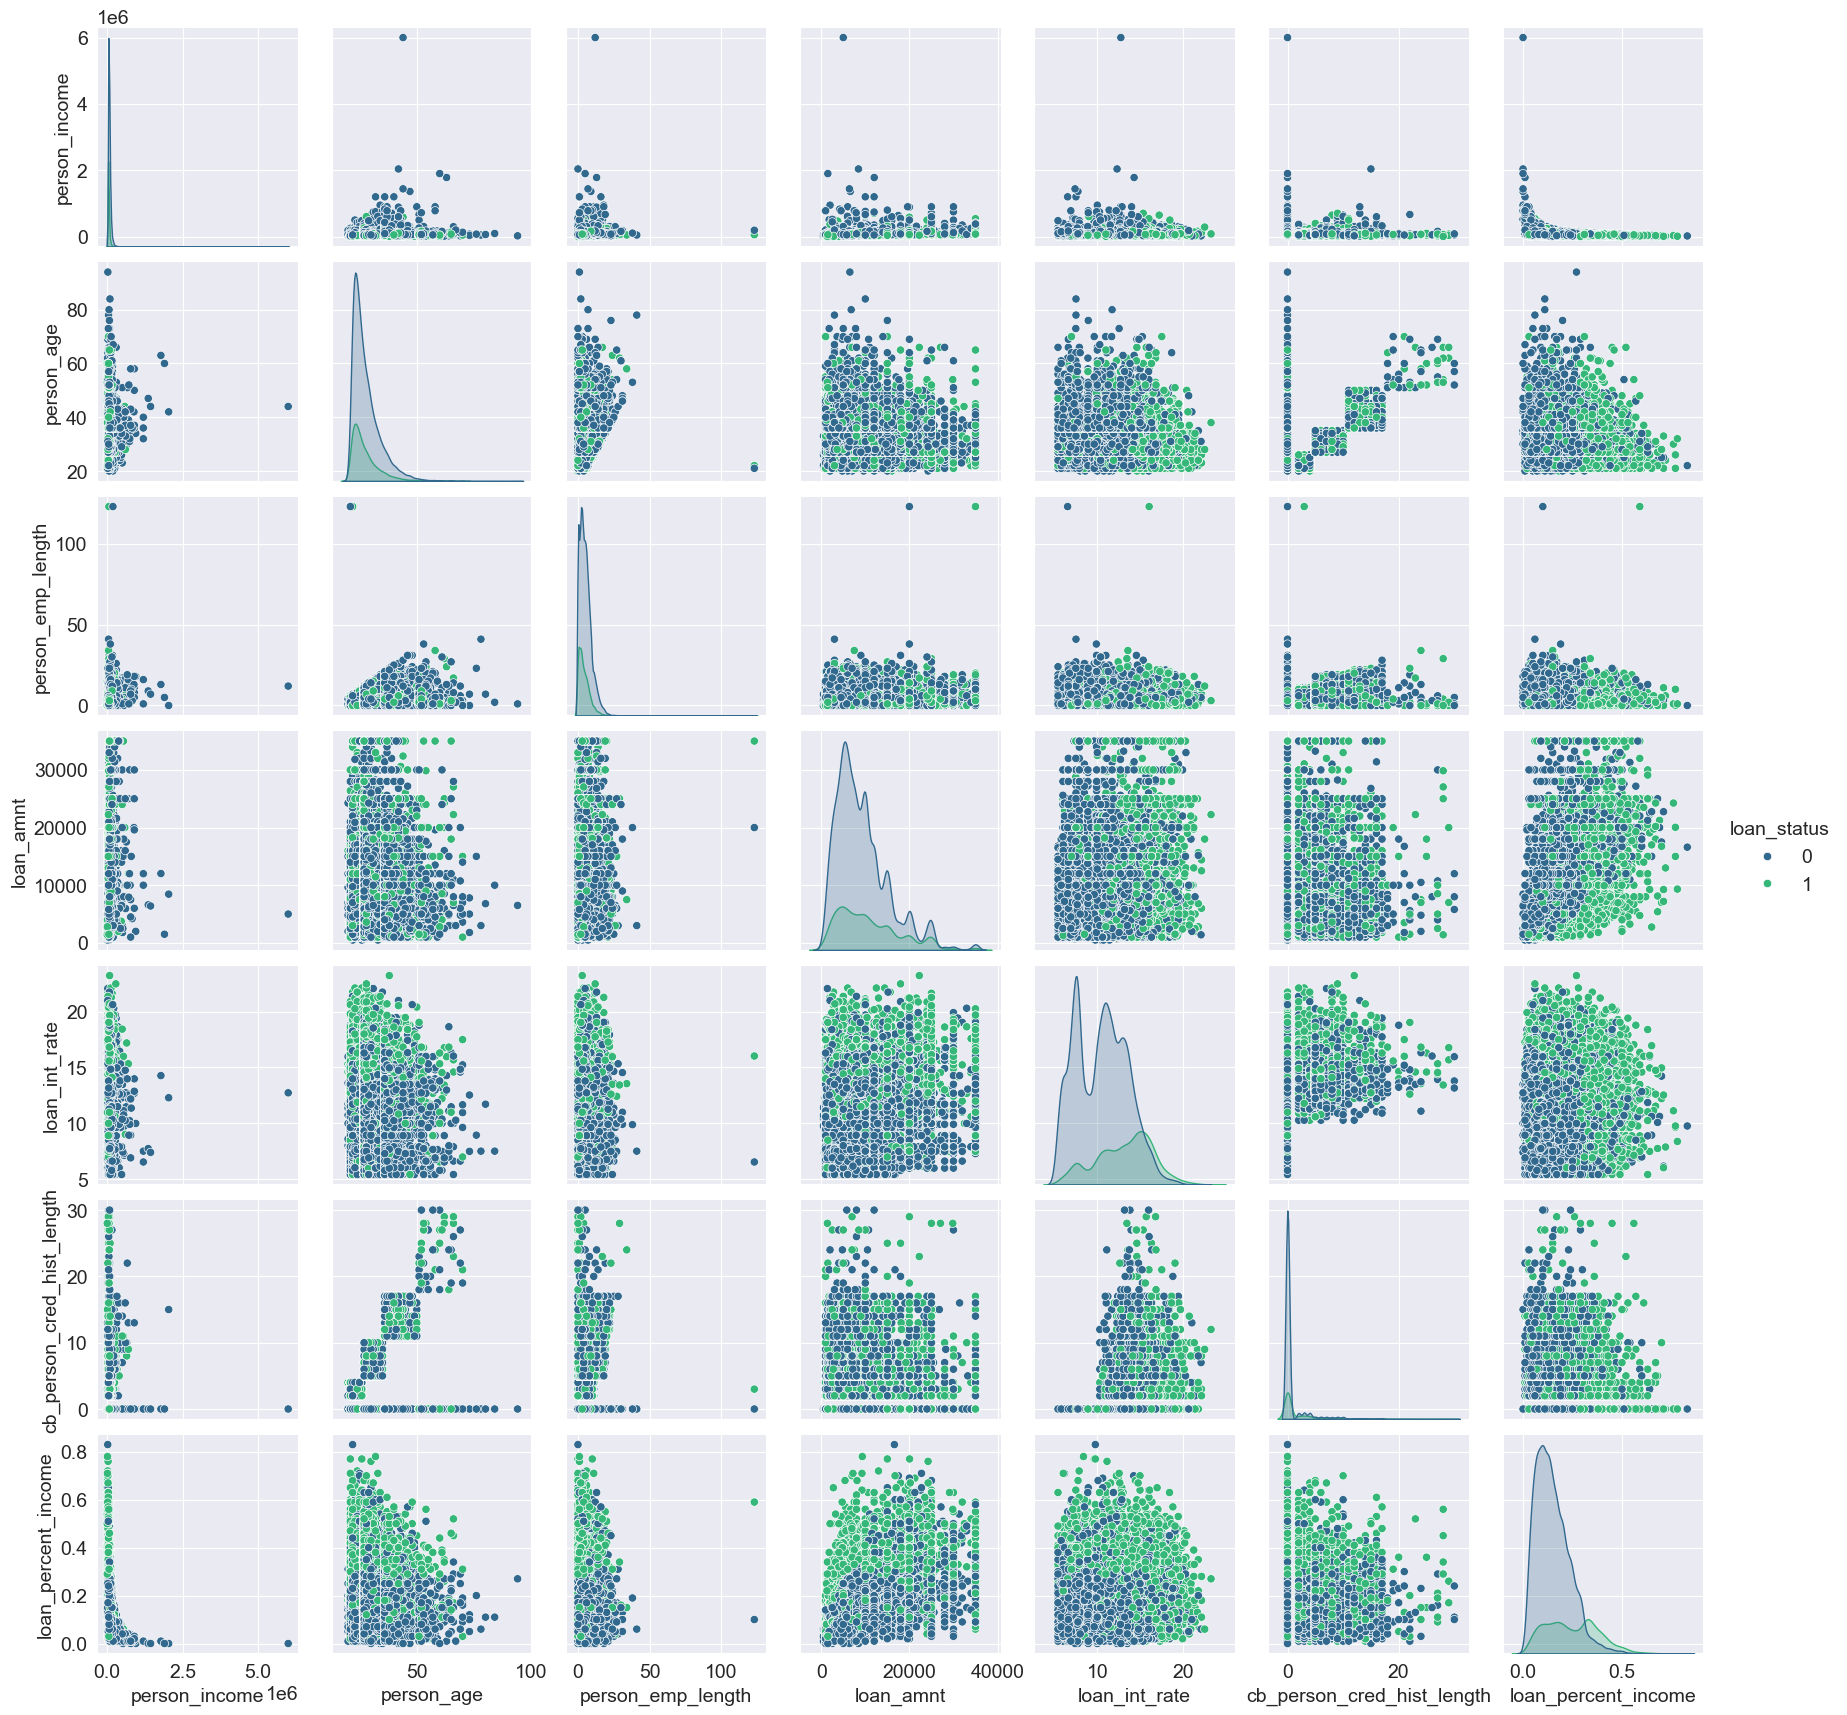

In [27]:
sns.pairplot(df_risk, hue = "loan_status", palette="viridis")
plt.show()

In [28]:
# Scatter plots cho mỗi cặp biến

fig = px.scatter_matrix(df_risk, dimensions= df_risk[num_cols], color= df_risk["loan_status"])

# Update layout and display the plot
fig.update_layout(title='Biểu đồ cặp dữ liệu với trạng thái cho vay', width=1750, height=1750)
fig.show()

In [26]:
num_cols

['person_income',
 'person_age',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length',
 'loan_percent_income',
 'loan_status']

In [27]:
df_risk.describe()

person_income    person_age  person_emp_length     loan_amnt  \
count   3.202900e+04  32029.000000       31153.000000  32029.000000   
mean    6.604990e+04     27.718692           4.786698   9594.017921   
std     6.196703e+04      6.190740           4.145822   6327.037600   
min     4.000000e+03     20.000000           0.000000    500.000000   
25%     3.850000e+04     23.000000           2.000000   5000.000000   
50%     5.500000e+04     26.000000           4.000000   8000.000000   
75%     7.944000e+04     30.000000           7.000000  12250.000000   
max     6.000000e+06     94.000000         123.000000  35000.000000   

       loan_int_rate  cb_person_cred_hist_length  loan_percent_income  \
count   28966.000000                32029.000000         32029.000000   
mean       11.034793                    1.046177             0.170258   
std         3.244371                    2.826134             0.106790   
min         5.420000                    0.000000             0.000000   
25%         7.900000                    0.000000             0.090000   
50%        10.990000                    0.000000             0.150000   
75%        13.480000                    0.000000             0.230000   
max        23.220000                   30.000000             0.830000   

        loan_status  
count  32029.000000  
mean       0.219176  
std        0.413695  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# 4. Feature Engineering

### Xử lý dữ liệu thiếu bằng cách tính trung bình các feature null ("person_emp_length", "loan_int_rate") dựa trên mục đích vay (loan_intent)

In [28]:
df_risk.head(10)

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
0                  RENT    PERSONAL          D                         Y   
1                   OWN   EDUCATION          B                         N   
2              MORTGAGE     MEDICAL          C                         N   
3                  RENT     MEDICAL          C                         N   
4                  RENT     MEDICAL          C                         Y   
5                   OWN     VENTURE          A                         N   
6                  RENT   EDUCATION          B                         N   
7                  RENT     MEDICAL          B                         N   
8                  RENT    PERSONAL          A                         N   
9                   OWN     VENTURE          D                         N   

   person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
0          59000          22              123.0      35000          16.02   
1           9600          21                5.0       1000          11.14   
2           9600          25                1.0       5500          12.87   
3          65500          23                4.0      35000          15.23   
4          54400          24                8.0      35000          14.27   
5           9900          21                2.0       2500           7.14   
6          77100          26                8.0      35000          12.42   
7          78956          24                5.0      35000          11.11   
8          83000          24                8.0      35000           8.90   
9          10000          21                6.0       1600          14.74   

   cb_person_cred_hist_length  loan_percent_income  loan_status  
0                           3                 0.59            1  
1                           0                 0.10            0  
2                           0                 0.57            1  
3                           0                 0.53            1  
4                           4                 0.55            1  
5                           0                 0.25            1  
6                           0                 0.45            1  
7                           0                 0.44            1  
8                           0                 0.42            1  
9                           0                 0.16            1

In [29]:
df_risk.isnull().sum()[df_risk.isnull().sum() > 0]

person_emp_length     876
loan_int_rate        3063
dtype: int64

Cả hai cột đều có dữ liệu số nên giá trị null có thể được điền theo giá trị trung bình. Dựa trên mục đích vay.

In [30]:
# Tính trung bình lãi suất khoản vay (loan_int_rate) cho mỗi loại mục đích vay (loan_intent)
df_risk.groupby('loan_intent')['loan_int_rate'].mean()

loan_intent
DEBTCONSOLIDATION    11.005907
EDUCATION            10.974572
HOMEIMPROVEMENT      11.224372
MEDICAL              11.079688
PERSONAL             11.023615
VENTURE              10.971227
Name: loan_int_rate, dtype: float64

Chúng ta có thể thay thế các giá trị null trong cột "loan interest rate" bằng giá trị trung bình là 11. Giá trị trung bình này được tính toán từ tập dữ liệu, có tính đến tất cả các danh mục.

In [31]:
# Điền các giá trị null trong cột 'loan_int_rate' bằng giá trị trung bình (ở đây nằm trong khoảng 11)
df_risk["loan_int_rate"].fillna(df_risk["loan_int_rate"].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15924\4158419114.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
# Tính trung bình thời gian làm việc (person_emp_length) cho mỗi mục đích vay (loan_intent)
df_risk.groupby('loan_intent')['person_emp_length'].transform('mean')

0        4.881449
1        4.463857
2        4.765741
3        4.765741
4        4.765741
           ...   
32571    4.886076
32574    4.881449
32575    4.463857
32576    4.881449
32578    5.144714
Name: person_emp_length, Length: 32029, dtype: float64

In [33]:
# Tính trung bình thời gian làm việc (person_emp_length) cho mỗi mục đích vay (loan_intent) làm tròn đến 2 chữ số thập phân
pel_fill = round(df_risk.groupby('loan_intent')['person_emp_length'].mean(), 2) 
pel_fill

loan_intent
DEBTCONSOLIDATION    4.75
EDUCATION            4.46
HOMEIMPROVEMENT      5.14
MEDICAL              4.77
PERSONAL             4.88
VENTURE              4.89
Name: person_emp_length, dtype: float64

Trong ngữ cảnh thời gian làm việc, việc biểu diễn đến đơn vị 0.01 năm (tương đương khoảng 3-4 ngày) thường là đủ chi tiết cho hầu hết các phân tích.

Để tính số ngày trong 0.01 năm, chúng ta cần thực hiện một phép tính đơn giản:

* Một năm thông thường có 365 ngày.
0.01 năm = 365 * 0.01 = 3.65 ngày

* Làm tròn kết quả, chúng ta có:
0.01 năm ≈ 3.65 ngày ≈ 3 ngày 15 giờ 36 phút
Vậy 0.01 năm tương đương với khoảng 3.65 ngày, hay gần đúng là 3 ngày rưỡi.

In [34]:
# Tính giá trị trung bình của 'person_emp_length' cho mỗi nhóm 'loan_intent'
# 'transform' áp dụng giá trị trung bình này cho mọi hàng trong nhóm tương ứng.
mean_emp_length_by_intent = df_risk.groupby('loan_intent')['person_emp_length'].transform('mean')

# Điền các giá trị null trong 'person_emp_length' bằng giá trị trung bình của nhóm 'loan_intent' tương ứng.
df_risk['person_emp_length'] = df_risk['person_emp_length'].fillna(mean_emp_length_by_intent)

# Làm tròn tất cả giá trị trong cột 'person_emp_length' đến 2 chữ số (số nguyên).
df_risk['person_emp_length'] = df_risk['person_emp_length'].round(2)

In [35]:
df_risk['person_emp_length']

0        123.0
1          5.0
2          1.0
3          4.0
4          8.0
         ...  
32571      1.0
32574      4.0
32575      0.0
32576      1.0
32578      3.0
Name: person_emp_length, Length: 32029, dtype: float64

In [36]:
df_risk

person_home_ownership      loan_intent loan_grade  \
0                      RENT         PERSONAL          D   
1                       OWN        EDUCATION          B   
2                  MORTGAGE          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                      RENT          MEDICAL          C   
...                     ...              ...        ...   
32571                  RENT          VENTURE          B   
32574                  RENT         PERSONAL          D   
32575                  RENT        EDUCATION          B   
32576              MORTGAGE         PERSONAL          C   
32578                  RENT  HOMEIMPROVEMENT          B   

      cb_person_default_on_file  person_income  person_age  person_emp_length  \
0                             Y          59000          22              123.0   
1                             N           9600          21                5.0   
2                             N           9600          25                1.0   
3                             N          65500          23                4.0   
4                             Y          54400          24                8.0   
...                         ...            ...         ...                ...   
32571                         N          45600          60                1.0   
32574                         Y          65004          52                4.0   
32575                         N          64500          52                0.0   
32576                         N          53000          57                1.0   
32578                         N          76000          65                3.0   

       loan_amnt  loan_int_rate  cb_person_cred_hist_length  \
0          35000          16.02                           3   
1           1000          11.14                           0   
2           5500          12.87                           0   
3          35000          15.23                           0   
4          35000          14.27                           4   
...          ...            ...                         ...   
32571      20000          10.00                           0   
32574      20000          15.58                          19   
32575       5000          11.26                           0   
32576       5800          13.16                           0   
32578      35000          10.99                           0   

       loan_percent_income  loan_status  
0                     0.59            1  
1                     0.10            0  
2                     0.57            1  
3                     0.53            1  
4                     0.55            1  
...                    ...          ...  
32571                 0.44            1  
32574                 0.31            1  
32575                 0.08            0  
32576                 0.11            0  
32578                 0.46            1  

[32029 rows x 12 columns]

In [37]:
# Kiểm tra lại dữ liệu có thiếu không
df_risk.isnull().sum()[df_risk.isnull().sum() > 0]

Series([], dtype: int64)

In [38]:
df_risk.describe()

person_income    person_age  person_emp_length     loan_amnt  \
count   3.202900e+04  32029.000000       32029.000000  32029.000000   
mean    6.604990e+04     27.718692           4.786778   9594.017921   
std     6.196703e+04      6.190740           4.088856   6327.037600   
min     4.000000e+03     20.000000           0.000000    500.000000   
25%     3.850000e+04     23.000000           2.000000   5000.000000   
50%     5.500000e+04     26.000000           4.000000   8000.000000   
75%     7.944000e+04     30.000000           7.000000  12250.000000   
max     6.000000e+06     94.000000         123.000000  35000.000000   

       loan_int_rate  cb_person_cred_hist_length  loan_percent_income  \
count   32029.000000                32029.000000         32029.000000   
mean       11.034793                    1.046177             0.170258   
std         3.085335                    2.826134             0.106790   
min         5.420000                    0.000000             0.000000   
25%         8.490000                    0.000000             0.090000   
50%        11.034793                    0.000000             0.150000   
75%        13.160000                    0.000000             0.230000   
max        23.220000                   30.000000             0.830000   

        loan_status  
count  32029.000000  
mean       0.219176  
std        0.413695  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [39]:
df_risk.reset_index(drop = True, inplace=True)

### Xử lý dữ liệu không cần thiết

In [40]:
df_risk[df_risk['person_age'] > 75]

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
31816                  RENT     MEDICAL          A                         N   
31877                  RENT     MEDICAL          C                         N   
31883                  RENT     MEDICAL          B                         N   
31967              MORTGAGE    PERSONAL          A                         N   
31995                  RENT     MEDICAL          A                         N   

       person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
31816          48000          78               41.0       3000       7.510000   
31877          24000          94                1.0       6500      11.034793   
31883          64000          80                7.0       6800      11.710000   
31967          94800          84                2.0      10000       7.510000   
31995          75000          76               23.0      15000       8.940000   

       cb_person_cred_hist_length  loan_percent_income  loan_status  
31816                           0                 0.06            0  
31877                           0                 0.27            0  
31883                           0                 0.11            0  
31967                           0                 0.11            0  
31995                           0                 0.20            0

Sau khi kiểm tra cột tuổi người đăng ký vay ta thấy hầu hết đều trả nợ đầy đủ (loan_status = 0) nên tiến hành xóa để dữ liệu tốt hơn cho quá trình training

In [41]:
df_risk = df_risk.drop(index = df_risk[df_risk['person_age'] > 75].index, axis=0)

In [42]:
# Kiểm tra thời gian làm việc của các cá nhân
df_risk[df_risk['person_emp_length'] > 40]

person_home_ownership loan_intent loan_grade cb_person_default_on_file  \
0                    RENT    PERSONAL          D                         Y   
210              MORTGAGE     VENTURE          A                         N   

     person_income  person_age  person_emp_length  loan_amnt  loan_int_rate  \
0            59000          22              123.0      35000          16.02   
210         192000          21              123.0      20000           6.54   

     cb_person_cred_hist_length  loan_percent_income  loan_status  
0                             3                 0.59            1  
210                           0                 0.10            0

Bỏ hai hàng này đi vì nếu một người mới 22 tuổi thì làm sao người đó có thể làm việc trong 123 năm được.

In [43]:
df_risk.drop(index = df_risk[df_risk['person_emp_length'] > 40].index, inplace=True)

In [44]:
df_risk

person_home_ownership      loan_intent loan_grade  \
1                       OWN        EDUCATION          B   
2                  MORTGAGE          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                      RENT          MEDICAL          C   
5                       OWN          VENTURE          A   
...                     ...              ...        ...   
32024                  RENT          VENTURE          B   
32025                  RENT         PERSONAL          D   
32026                  RENT        EDUCATION          B   
32027              MORTGAGE         PERSONAL          C   
32028                  RENT  HOMEIMPROVEMENT          B   

      cb_person_default_on_file  person_income  person_age  person_emp_length  \
1                             N           9600          21                5.0   
2                             N           9600          25                1.0   
3                             N          65500          23                4.0   
4                             Y          54400          24                8.0   
5                             N           9900          21                2.0   
...                         ...            ...         ...                ...   
32024                         N          45600          60                1.0   
32025                         Y          65004          52                4.0   
32026                         N          64500          52                0.0   
32027                         N          53000          57                1.0   
32028                         N          76000          65                3.0   

       loan_amnt  loan_int_rate  cb_person_cred_hist_length  \
1           1000          11.14                           0   
2           5500          12.87                           0   
3          35000          15.23                           0   
4          35000          14.27                           4   
5           2500           7.14                           0   
...          ...            ...                         ...   
32024      20000          10.00                           0   
32025      20000          15.58                          19   
32026       5000          11.26                           0   
32027       5800          13.16                           0   
32028      35000          10.99                           0   

       loan_percent_income  loan_status  
1                     0.10            0  
2                     0.57            1  
3                     0.53            1  
4                     0.55            1  
5                     0.25            1  
...                    ...          ...  
32024                 0.44            1  
32025                 0.31            1  
32026                 0.08            0  
32027                 0.11            0  
32028                 0.46            1  

[32022 rows x 12 columns]

In [45]:
df_risk.reset_index(drop = True, inplace = True)

In [46]:
# Hiển thị tần suất tương đối của các giá trị trong cột 'cb_person_default_on_file'
df_risk["cb_person_default_on_file"].value_counts(1)

cb_person_default_on_file
N    0.821092
Y    0.178908
Name: proportion, dtype: float64

In [47]:
df_risk.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_income', 'person_age',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'cb_person_cred_hist_length', 'loan_percent_income', 'loan_status'],
      dtype='object')

## Xử lý dữ liệu ngoại lai (outlier)

In [48]:
df_risk.describe()

person_income    person_age  person_emp_length     loan_amnt  \
count   3.202200e+04  32022.000000       32022.000000  32022.000000   
mean    6.604695e+04     27.710543           4.777831   9593.107863   
std     6.196904e+04      6.152878           3.974586   6325.646009   
min     4.000000e+03     20.000000           0.000000    500.000000   
25%     3.850000e+04     23.000000           2.000000   5000.000000   
50%     5.500000e+04     26.000000           4.000000   8000.000000   
75%     7.943400e+04     30.000000           7.000000  12250.000000   
max     6.000000e+06     73.000000          38.000000  35000.000000   

       loan_int_rate  cb_person_cred_hist_length  loan_percent_income  \
count   32022.000000                32022.000000         32022.000000   
mean       11.035042                    1.046312             0.170250   
std         3.085294                    2.826386             0.106771   
min         5.420000                    0.000000             0.000000   
25%         8.490000                    0.000000             0.090000   
50%        11.034793                    0.000000             0.150000   
75%        13.160000                    0.000000             0.230000   
max        23.220000                   30.000000             0.830000   

        loan_status  
count  32022.000000  
mean       0.219193  
std        0.413706  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

- Dựa trên thống kê mô tả, đây là cách xử lý ngoại lai cho từng biến:

- person_age:

Giới hạn dưới: max(20, Q1 - 1.5 * IQR) = max(20, 23 - 1.5 * (30 - 23)) = 20
Giới hạn trên: min(73, Q3 + 1.5 * IQR) = min(73, 30 + 1.5 * (30 - 23)) = 40.5


- person_income:

Giới hạn dưới: max(4000, Q1 - 1.5 * IQR) = max(4000, 38500 - 1.5 * (79200 - 38500)) = 38500
Giới hạn trên: Q3 + 1.5 * IQR = 79200 + 1.5 * (79200 - 38500) = 140250


- person_emp_length:

Giới hạn dưới: max(0, Q1 - 1.5 * IQR) = max(0, 2 - 1.5 * (7 - 2)) = 0
Giới hạn trên: Q3 + 1.5 * IQR = 7 + 1.5 * (7 - 2) = 14.5


- loan_amnt:

Giới hạn dưới: max(500, Q1 - 1.5 * IQR) = max(500, 5000 - 1.5 * (12250 - 5000)) = 500
Giới hạn trên: min(35000, Q3 + 1.5 * IQR) = min(35000, 12250 + 1.5 * (12250 - 5000)) = 23125


- loan_int_rate:

Giới hạn dưới: max(5.42, Q1 - 1.5 * IQR) = max(5.42, 8.49 - 1.5 * (13.11 - 8.49)) = 5.42
Giới hạn trên: min(23.22, Q3 + 1.5 * IQR) = min(23.22, 13.11 + 1.5 * (13.11 - 8.49)) = 20.04


loan_status: Đây là biến nhị phân (0 hoặc 1), không cần xử lý ngoại lai.

- loan_percent_income:

Giới hạn dưới: max(0, Q1 - 1.5 * IQR) = max(0, 0.09 - 1.5 * (0.23 - 0.09)) = 0
Giới hạn trên: min(0.83, Q3 + 1.5 * IQR) = min(0.83, 0.23 + 1.5 * (0.23 - 0.09)) = 0.44


- cb_person_cred_hist_length:

Giới hạn dưới: max(2, Q1 - 1.5 * IQR) = max(2, 3 - 1.5 * (8 - 3)) = 2
Giới hạn trên: min(30, Q3 + 1.5 * IQR) = min(30, 8 + 1.5 * (8 - 3)) = 15.5

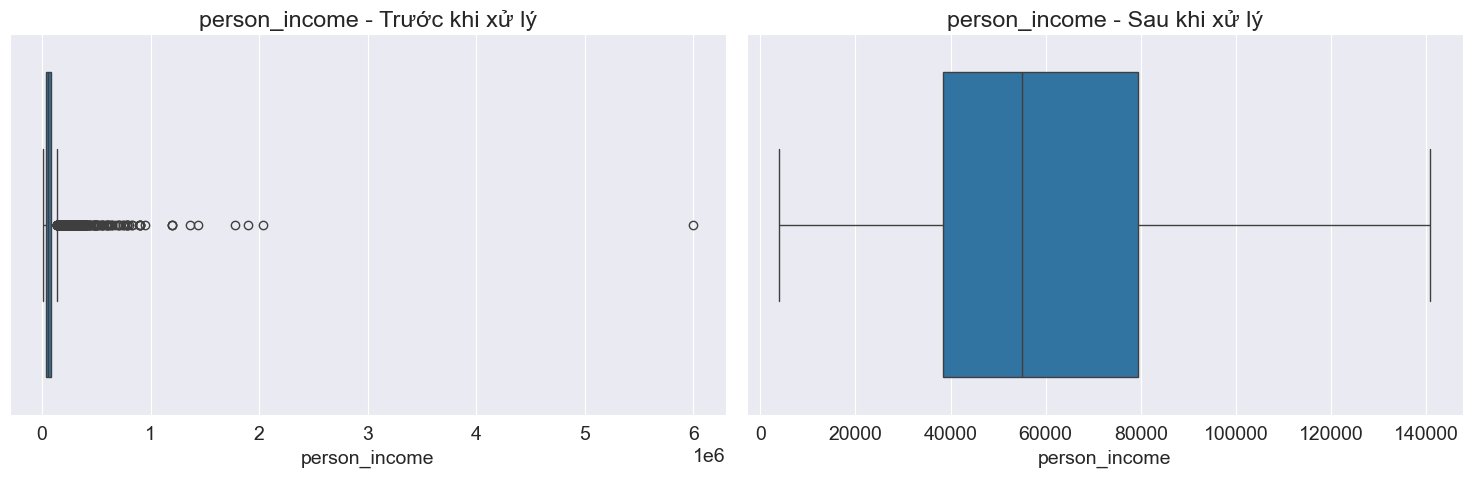

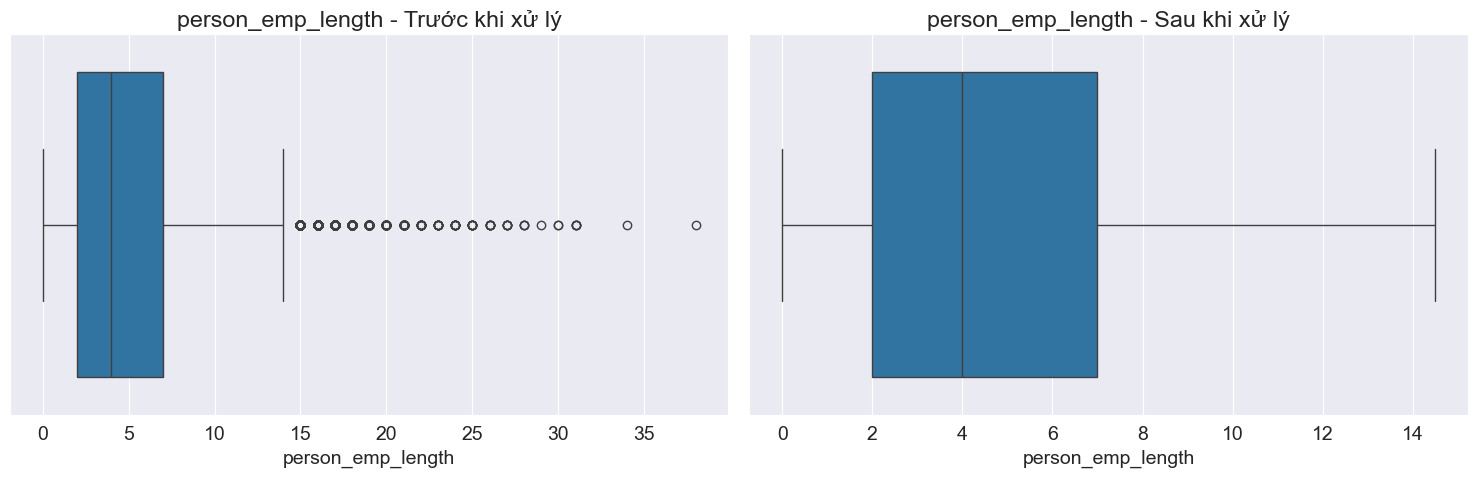

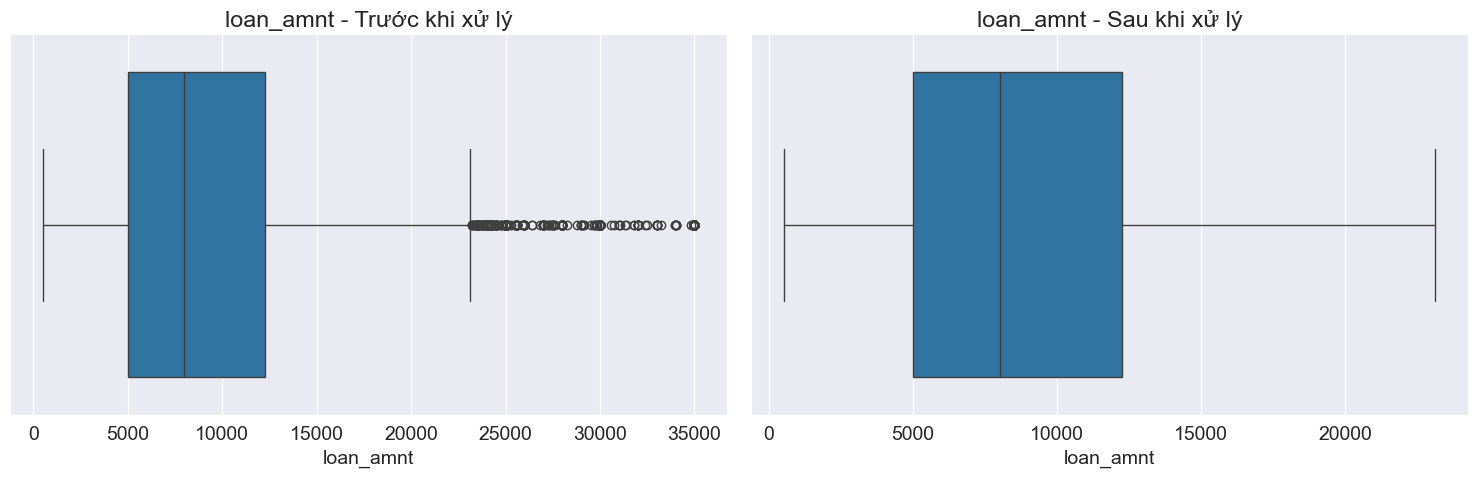

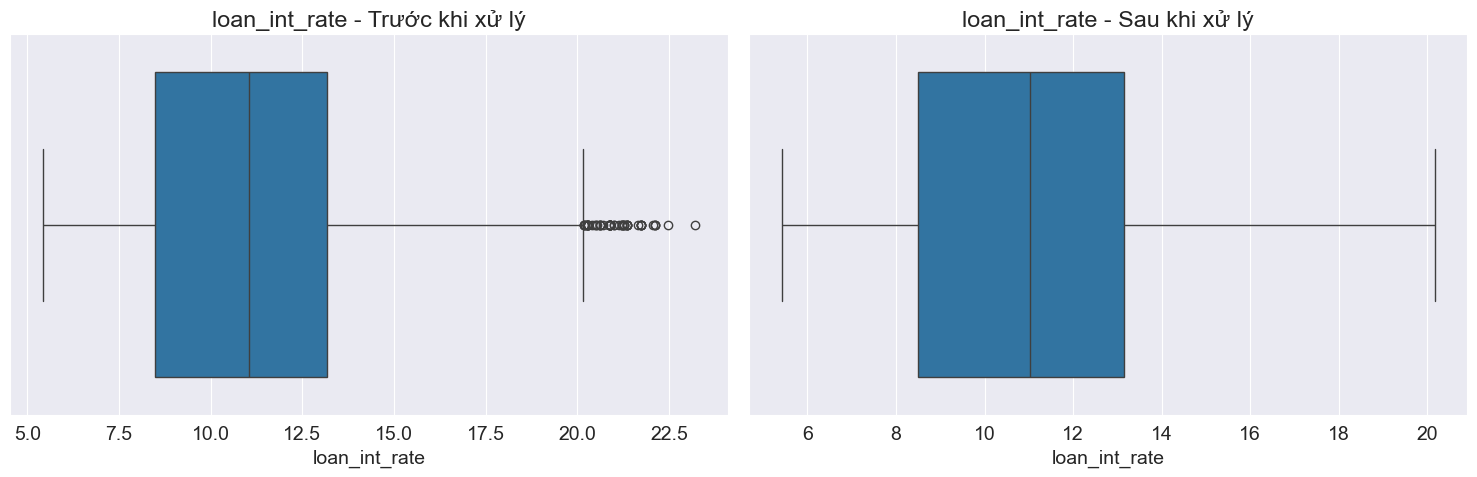

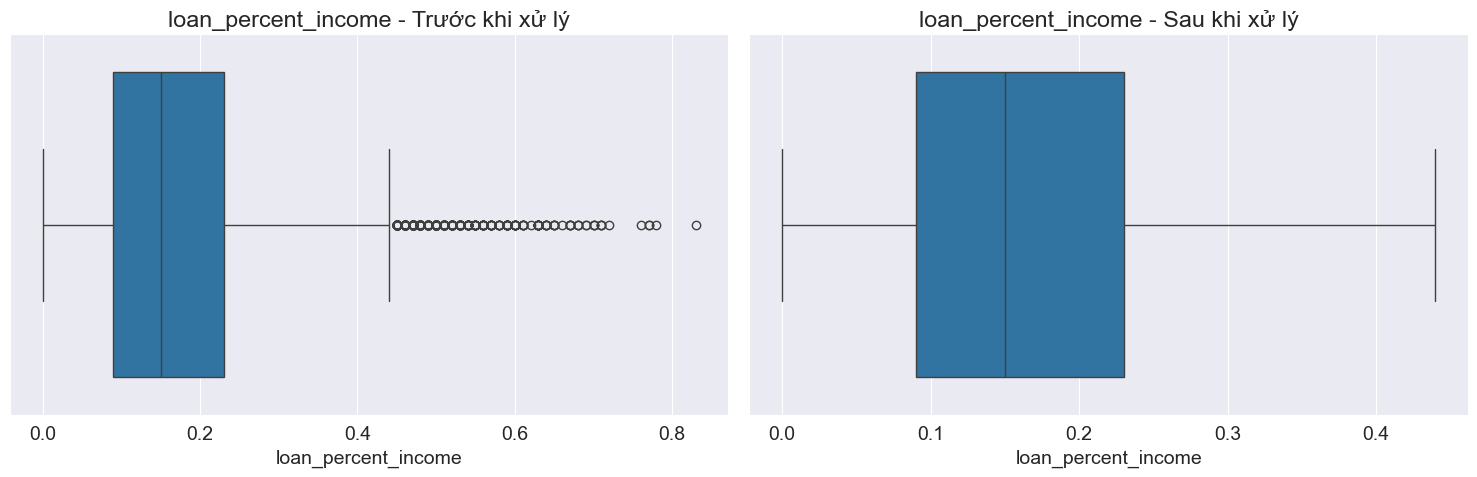

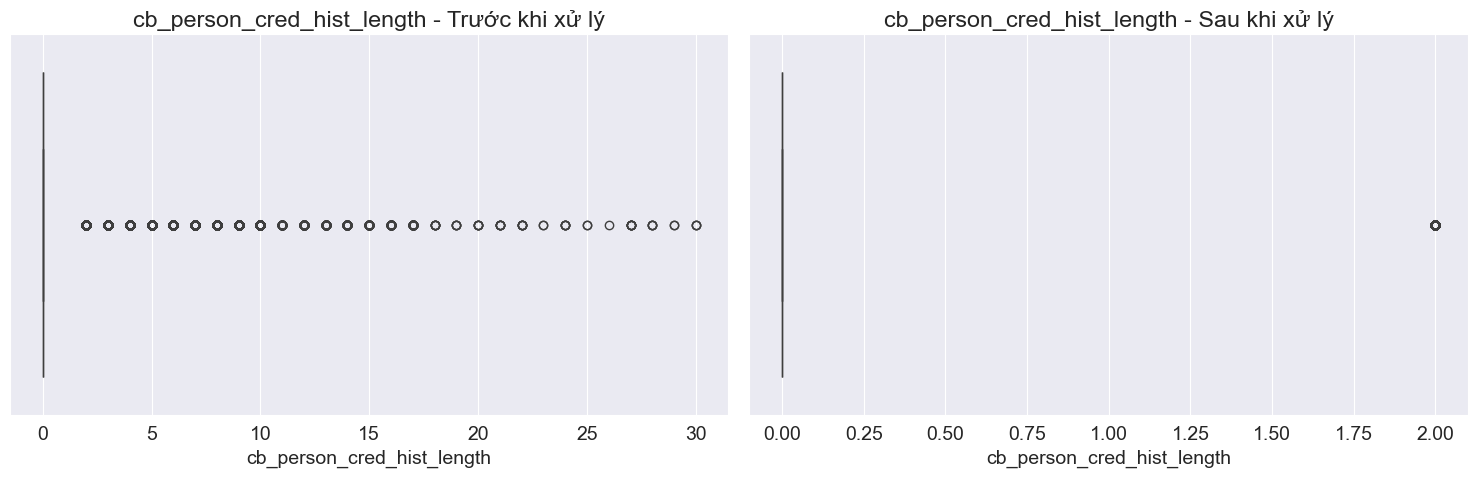

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def handle_outliers(df, column, min_val, max_val):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(min_val, Q1 - 1.5 * IQR)
    upper_bound = min(max_val, Q3 + 1.5 * IQR)
    
    df_cleaned = df.copy()
    df_cleaned[column] = np.clip(df_cleaned[column], lower_bound, upper_bound)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(x=df[column], ax=ax1)
    ax1.set_title(f'{column} - Trước khi xử lý')
    
    sns.boxplot(x=df_cleaned[column], ax=ax2)
    ax2.set_title(f'{column} - Sau khi xử lý')
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned

# Sử dụng hàm cho các đặc trưng còn lại
df_risk = handle_outliers(df_risk, 'person_income', 4000, 2039784)
df_risk = handle_outliers(df_risk, 'person_emp_length', 0, 38)
df_risk = handle_outliers(df_risk, 'loan_amnt', 500, 35000)
df_risk = handle_outliers(df_risk, 'loan_int_rate', 5.42, 23.22)
df_risk = handle_outliers(df_risk, 'loan_percent_income', 0, 0.83)
df_risk = handle_outliers(df_risk, 'cb_person_cred_hist_length', 2, 30)

# Lưu ý: 'loan_status' là biến nhị phân, không cần xử lý ngoại lai

In [50]:
col_list = ['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent', 
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 ]


# List chứa các cột là object nhiều hơn category để chuẩn bị cho one-hot
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']
# List chứa các cột là object chứa 2 category để chuẩn bị cho one-hot
ord_col = ["cb_person_default_on_file"]

In [54]:
df_risk.to_csv("G:\\Loan Data Analysis\\data\\credit_risk_dataset2.csv", index = False)

# 5. Data Preprocessing

In [51]:
X = df_risk.drop(columns= ['loan_status'])
y = df_risk['loan_status']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12, stratify = y )
print(f"Shape of X train {X_train.shape}, X test {X_test.shape}")
print(f"Shape of Y train {y_train.shape}, Y test {y_test.shape}")

Shape of X train (24016, 11), X test (8006, 11)
Shape of Y train (24016,), Y test (8006,)


In [53]:
X_train.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_income', 'person_age',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'cb_person_cred_hist_length', 'loan_percent_income'],
      dtype='object')

### Áp dụng One Hot Encoder trên các cột category có nhiều hơn 2 category

In [54]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [55]:
X_train.sample(10)

person_home_ownership        loan_intent loan_grade  \
4003                   RENT          EDUCATION          B   
29271                 OTHER          EDUCATION          C   
4037                   RENT  DEBTCONSOLIDATION          A   
26418              MORTGAGE            VENTURE          E   
24755              MORTGAGE           PERSONAL          A   
31176              MORTGAGE            MEDICAL          A   
16566              MORTGAGE          EDUCATION          A   
18011                  RENT            VENTURE          C   
992                    RENT            VENTURE          B   
4637                   RENT          EDUCATION          B   

      cb_person_default_on_file  person_income  person_age  person_emp_length  \
4003                          N          55000          24                0.0   
29271                         Y          37500          38                0.0   
4037                          N          65000          24                0.0   
26418                         Y         110000          28                0.0   
24755                         N          80000          34                5.0   
31176                         N         120000          39                9.0   
16566                         N          60000          22                6.0   
18011                         N          42000          31                1.0   
992                           N          52526          25                9.0   
4637                          N         140835          23                1.0   

       loan_amnt  loan_int_rate  cb_person_cred_hist_length  ...  \
4003        4000          11.26                           0  ...   
29271      12000          13.47                           2  ...   
4037        4000           7.51                           0  ...   
26418      15000          16.32                           2  ...   
24755      12000           7.49                           0  ...   
31176      12000           5.79                           0  ...   
16566      11200           5.79                           0  ...   
18011      20000          13.57                           0  ...   
992        18000          12.21                           0  ...   
4637       10000          12.69                           0  ...   

       person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
4003                              0.0                          0.0   
29271                             0.0                          1.0   
4037                              0.0                          0.0   
26418                             1.0                          0.0   
24755                             1.0                          0.0   
31176                             1.0                          0.0   
16566                             1.0                          0.0   
18011                             0.0                          0.0   
992                               0.0                          0.0   
4637                              0.0                          0.0   

       person_home_ownership_OWN  person_home_ownership_RENT  \
4003                         0.0                         1.0   
29271                        0.0                         0.0   
4037                         0.0                         1.0   
26418                        0.0                         0.0   
24755                        0.0                         0.0   
31176                        0.0                         0.0   
16566                        0.0                         0.0   
18011                        0.0                         1.0   
992                          0.0                         1.0   
4637                         0.0                         1.0   

       loan_intent_DEBTCONSOLIDATION  loan_intent_EDUCATION  \
4003                             0.0                    1.0   
29271                            0.0                    1.0   
4037                        

In [56]:
X_train.drop(columns = ohe_colums, inplace = True)
X_test.drop(columns = ohe_colums, inplace = True)

In [57]:
X_train

cb_person_default_on_file  person_income  person_age  person_emp_length  \
18855                         Y          50000          31               0.00   
2854                          N          35000          25               9.00   
6478                          N          50000          22               4.89   
19420                         N          24000          32               4.77   
6088                          N          36800          26               0.00   
...                         ...            ...         ...                ...   
14656                         N          98004          24               5.00   
27504                         Y         140835          33              14.50   
31987                         N         132000          70               0.00   
15894                         N         125000          24               9.00   
19697                         Y          70000          27               9.00   

       loan_amnt  loan_int_rate  cb_person_cred_hist_length  \
18855       2400      11.030000                           2   
2854        7000      11.034793                           0   
6478       10000      12.690000                           0   
19420       3500      11.860000                           0   
6088        5900      10.710000                           0   
...          ...            ...                         ...   
14656       2500       8.490000                           0   
27504      15000      13.160000                           2   
31987      14000      11.034793                           0   
15894      19200      10.990000                           0   
19697       3600      14.790000                           2   

       loan_percent_income  loan_grade_A  loan_grade_B  ...  \
18855                 0.05           0.0           0.0  ...   
2854                  0.20           1.0           0.0  ...   
6478                  0.20           0.0           1.0  ...   
19420                 0.15           0.0           1.0  ...   
6088                  0.16           0.0           1.0  ...   
...                    ...           ...           ...  ...   
14656                 0.03           1.0           0.0  ...   
27504                 0.06           0.0           0.0  ...   
31987                 0.11           1.0           0.0  ...   
15894                 0.15           0.0           1.0  ...   
19697                 0.05           0.0           0.0  ...   

       person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
18855                             0.0                          0.0   
2854                              1.0                          0.0   
6478                              1.0                          0.0   
19420                             0.0                          0.0   
6088                              0.0                          0.0   
...                               ...                          ...   
14656                             1.0                          0.0   
27504                             0.0                          0.0   
31987                             1.0                          0.0   
15894                             0.0                          0.0   
19697                             0.0                          0.0   

       person_home_ownership_OWN  person_home_ownership_RENT  \
18855                        0.0                         1.0   
2854                         0.0                         0.0   
6478                         0.0                         0.0   
19420                        0.0                         1.0   
6088                         0.0                         1.0   
...                          ...                         ...   
14656                        0.0                         0.0   
27504                        1.0                         0.0   
31987                        0.0                         0.0   
15894                        0.0      

### Áp dụng Ordinal Encoder trên một cột category chỉ có 2 category

In [58]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()

X_train["cb_person_default_on_file"] = ore.fit_transform(X_train[["cb_person_default_on_file"]])
X_test["cb_person_default_on_file"] = ore.transform(X_test[["cb_person_default_on_file"]])

In [59]:
X_train

cb_person_default_on_file  person_income  person_age  \
18855                        1.0          50000          31   
2854                         0.0          35000          25   
6478                         0.0          50000          22   
19420                        0.0          24000          32   
6088                         0.0          36800          26   
...                          ...            ...         ...   
14656                        0.0          98004          24   
27504                        1.0         140835          33   
31987                        0.0         132000          70   
15894                        0.0         125000          24   
19697                        1.0          70000          27   

       person_emp_length  loan_amnt  loan_int_rate  \
18855               0.00       2400      11.030000   
2854                9.00       7000      11.034793   
6478                4.89      10000      12.690000   
19420               4.77       3500      11.860000   
6088                0.00       5900      10.710000   
...                  ...        ...            ...   
14656               5.00       2500       8.490000   
27504              14.50      15000      13.160000   
31987               0.00      14000      11.034793   
15894               9.00      19200      10.990000   
19697               9.00       3600      14.790000   

       cb_person_cred_hist_length  loan_percent_income  loan_grade_A  \
18855                           2                 0.05           0.0   
2854                            0                 0.20           1.0   
6478                            0                 0.20           0.0   
19420                           0                 0.15           0.0   
6088                            0                 0.16           0.0   
...                           ...                  ...           ...   
14656                           0                 0.03           1.0   
27504                           2                 0.06           0.0   
31987                           0                 0.11           1.0   
15894                           0                 0.15           0.0   
19697                           2                 0.05           0.0   

       loan_grade_B  ...  person_home_ownership_MORTGAGE  \
18855           0.0  ...                             0.0   
2854            0.0  ...                             1.0   
6478            1.0  ...                             1.0   
19420           1.0  ...                             0.0   
6088            1.0  ...                             0.0   
...             ...  ...                             ...   
14656           0.0  ...                             1.0   
27504           0.0  ...                             0.0   
31987           0.0  ...                             1.0   
15894           1.0  ...                             0.0   
19697           0.0  ...                             0.0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
18855                          0.0                        0.0   
2854                           0.0                        0.0   
6478                           0.0                        0.0   
19420                          0.0                        0.0   
6088                           0.0                        0.0   
...                            ...                        ...   
14656                          0.0                        0.0   
27504                          0.0                        1.0   
31987                          0.0                        0.0   
15894                          0.0                        0.0   
19697                          0.0                        0.0   

       person_home_ownership_RENT  loan_intent_DEBTCONSOLIDATION  \
18855                         1.0                            0.0   
2854                          0.0                            1.0   
6478                          

Sự khác biệt giữa OneHotEncoder và OrdinalEncoder:
* OneHotEncoder: Chuyển đổi các giá trị phân loại thành các vector nhị phân (binary vectors). Với mỗi giá trị phân loại, OneHotEncoder tạo ra một cột riêng biệt. Nếu giá trị xuất hiện, cột tương ứng sẽ có giá trị là 1, còn lại sẽ là 0.
* OrdinalEncoder:  Chuyển đổi các giá trị phân loại thành các số nguyên. Mỗi giá trị phân loại được ánh xạ đến một số nguyên duy nhất, theo một thứ tự cố định.

In [60]:
X_train.shape

(24016, 25)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24016 entries, 18855 to 19697
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cb_person_default_on_file       24016 non-null  float64
 1   person_income                   24016 non-null  int64  
 2   person_age                      24016 non-null  int64  
 3   person_emp_length               24016 non-null  float64
 4   loan_amnt                       24016 non-null  int64  
 5   loan_int_rate                   24016 non-null  float64
 6   cb_person_cred_hist_length      24016 non-null  int64  
 7   loan_percent_income             24016 non-null  float64
 8   loan_grade_A                    24016 non-null  float64
 9   loan_grade_B                    24016 non-null  float64
 10  loan_grade_C                    24016 non-null  float64
 11  loan_grade_D                    24016 non-null  float64
 12  loan_grade_E                    2

In [62]:
y_train.value_counts(normalize=True)

loan_status
0    0.780813
1    0.219187
Name: proportion, dtype: float64

Vì dữ liệu ở đây bị imbalanced, nên ở đây mình sẽ sử dụng Kỹ thuật lấy mẫu quá mức thiểu số tổng hợp (SMOTE) để giải quyết vấn đề này. Hiện tại, tỷ lệ giữa các lớp đa số và thiểu số là 78:22. Sau khi áp dụng SMOTE, tỷ lệ này dự kiến ​​sẽ được điều chỉnh thành khoảng 66:34.

In [63]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={1: 10000}, random_state=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

Vì sao ở đây mình lấy lớp 1 thêm 10000 mẫu tại vì không phải lúc nào chia 50 50 là cũng tốt mà cần phải dựa trên tập dữ liệu nếu chia 50 50 có thể dẫn đến sự sai lệch phân bố thực tế và tăng nguy cơ overfiting

In [64]:
y_train_resampled.value_counts(1)

loan_status
0    0.652198
1    0.347802
Name: proportion, dtype: float64

In [65]:
X_train_resampled.duplicated().sum()

29

In [66]:
drop_index = X_train_resampled[X_train_resampled.duplicated()].index

In [67]:
X_train_resampled.drop(index = drop_index, inplace = True)
y_train_resampled.drop(index = drop_index, inplace = True)

In [68]:
y_train_resampled.value_counts(1)

loan_status
0    0.652334
1    0.347666
Name: proportion, dtype: float64

## Standardation

In [69]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_scaled= pd.DataFrame(std.fit_transform(X_train_resampled), columns=X_train_resampled.columns, index= X_train_resampled.index)
X_test_scaled= pd.DataFrame(std.transform(X_test), columns=X_test.columns, index= X_test.index)

# 6. Machine Learning Classification Models 

In [70]:
# Importing classification report and confussion matrix

from sklearn.metrics import classification_report, confusion_matrix

def confusion(y_test, y_pred):
    sns.set_theme(style= "whitegrid")
    plt.rcParams["figure.figsize"] = [5,3]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    cm = sns.heatmap(df_cm,annot=True, fmt="g")
    cm.plot()

## 1. Logistic Regression

### Create a LogisticRegression instance after SMOTE

### Create a LogisticRegression instance before SMOTE

Accuracy on train data 0.8518904063957362
Accuracy on test data 0.8559830127404446
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6251
           1       0.78      0.48      0.59      1755

    accuracy                           0.86      8006
   macro avg       0.82      0.72      0.75      8006
weighted avg       0.85      0.86      0.84      8006



C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



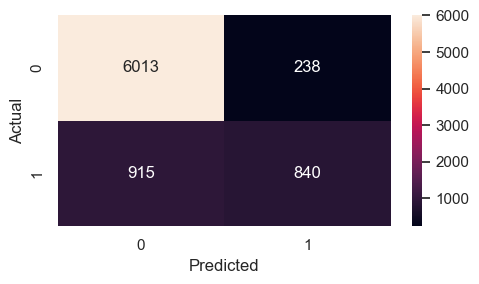

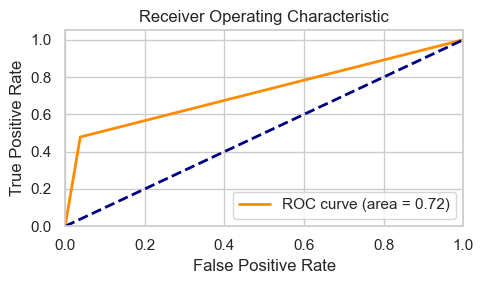

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lrg = LogisticRegression(max_iter=1000, random_state=42)

lrg.fit(X_train, y_train)
y_pred_lrg = lrg.predict(X_test)

print(f"Accuracy on train data {lrg.score(X_train, y_train)}")
print(f"Accuracy on test data {lrg.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lrg)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- Trước khi áp dụng SMOTE, mô hình đạt độ chính xác khoảng 85% trên dữ liệu thử nghiệm, với độ chính xác là 0,78 đối với lớp 1 và 0,86 đối với lớp 0. Tuy nhiên, sau khi áp dụng SMOTE, độ chính xác giảm xuống khoảng 84.6% trên dữ liệu thử nghiệm, với độ chính xác là 0,66 đối với lớp 1 và 0,90 đối với lớp 0.
- Ngoài ra, khả năng thu hồi và điểm F1 đối với lớp 1 bị giảm sau khi áp dụng SMOTE, cho thấy hiệu suất kém trong việc xác định các trường hợp của lớp thiểu số.

## 2. Decision Tree

### Before Smote

 Accuracy on train data: 1.0
 Accuracy on test data: 0.8883337496877342
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6251
           1       0.74      0.77      0.75      1755

    accuracy                           0.89      8006
   macro avg       0.83      0.84      0.84      8006
weighted avg       0.89      0.89      0.89      8006



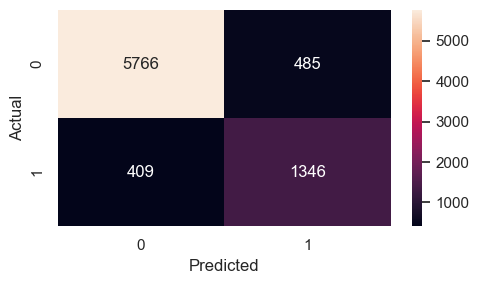

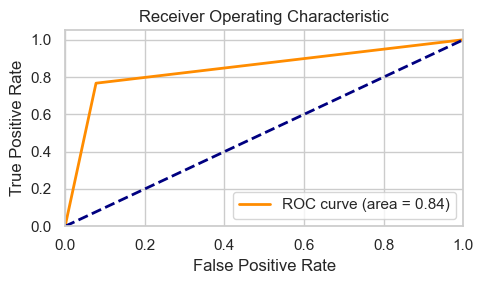

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
print(f" Accuracy on train data: {dtc.score(X_train, y_train)}")
print(f" Accuracy on test data: {dtc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_dtc))
confusion(y_test, y_pred_dtc)


# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### After Smote

 Accuracy on train data: 1.0
 Accuracy on test data: 0.8894579065700724
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6251
           1       0.74      0.77      0.75      1755

    accuracy                           0.89      8006
   macro avg       0.84      0.85      0.84      8006
weighted avg       0.89      0.89      0.89      8006



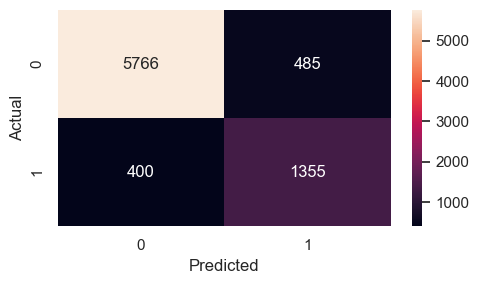

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_dtc = dtc.predict(X_test)
print(f" Accuracy on train data: {dtc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {dtc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_dtc))
confusion(y_test, y_pred_dtc)

- Mô hình cây quyết định cho thấy dấu hiệu rõ ràng của tình trạng quá khớp (overfittinh), như thấy ở độ chính xác cao trên dữ liệu đào tạo nhưng hiệu suất thấp hơn trên dữ liệu thử nghiệm.
- Ngay cả sau khi giải quyết mất cân bằng lớp với SMOTE, vấn đề quá khớp vẫn tồn tại.
- Do đó, chỉ dựa vào mô hình cây quyết định có thể không phải là cách tiếp cận phù hợp.

## 3. Random Forest

### Before Smote

 Accuracy on train data: 0.9999167221852099
 Accuracy on test data: 0.9339245565825631
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.97      0.72      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.95      0.86      0.89      8006
weighted avg       0.94      0.93      0.93      8006



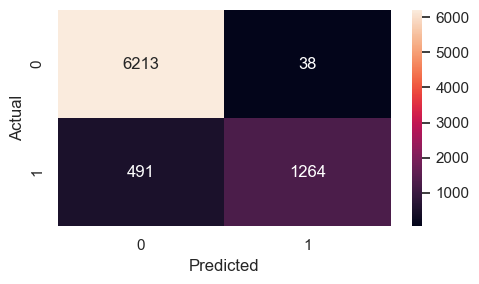

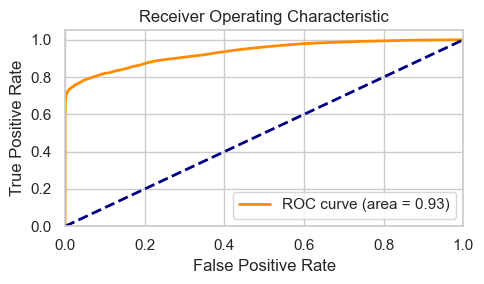

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from joblib import dump

rfc = RandomForestClassifier(random_state=1008)
rfc.fit(X_train, y_train)
dump(rfc, 'random_forest_model.joblib')
y_pred_rfc = rfc.predict(X_test)
y_probs_rfc = rfc.predict_proba(X_test)[:, 1]
print(f" Accuracy on train data: {rfc.score(X_train, y_train)}")
print(f" Accuracy on test data: {rfc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rfc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [103]:
rfc.feature_importances_

array([0.04934872, 0.09037544, 0.06620473, 0.08813546, 0.12783105,
       0.23016906, 0.01115716, 0.03796849, 0.01112849, 0.00694828,
       0.01946678, 0.05192669, 0.01384603, 0.0036643 , 0.00212717,
       0.02717232, 0.00061283, 0.01813488, 0.05316823, 0.02513985,
       0.01137327, 0.01573193, 0.02103059, 0.00911819, 0.00822007])

In [104]:
df_risk.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### Hyperparameter Tunning 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 22, 'max_features': 'sqrt'}
Accuracy on test data: 0.9254413035427725
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6329
           1       0.96      0.69      0.80      1772

    accuracy                           0.93      8101
   macro avg       0.94      0.84      0.88      8101
weighted avg       0.93      0.93      0.92      8101



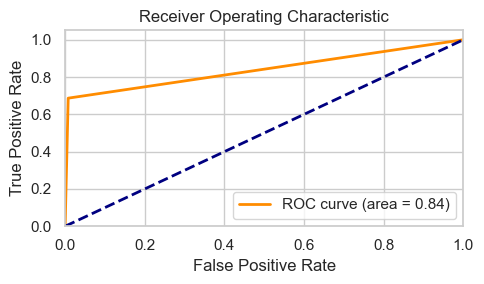

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Giả sử X_train_resampled và y_train_resampled đã được định nghĩa trước đó

# Khởi tạo RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Xác định các tham số và giá trị cần tìm kiếm
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, 20, 22],
    "class_weight": ["balanced", "balanced_subsample"],
    "max_features": ["sqrt", "log2"]
}

# Khởi tạo GridSearchCV với RandomForestClassifier
gs_rfc = GridSearchCV(estimator=rfc,
                      param_grid=parameters,
                      scoring='accuracy',
                      cv=5,
                      n_jobs=4,
                      verbose=2)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện đã được cân bằng
gs_rfc.fit(X_train_resampled, y_train_resampled)

# In ra tham số tốt nhất
print("Best parameters found: ", gs_rfc.best_params_)

# Sử dụng mô hình tốt nhất để dự đoán
best_rfc = gs_rfc.best_estimator_
y_pred = best_rfc.predict(X_test)

# In kết quả
print(f"Accuracy on test data: {best_rfc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
gs_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=22, random_state=42)

### Applying Random Forest with best parameters


 Accuracy on train data: 0.9930974978429681
 Accuracy on test data: 0.9254413035427725
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6329
           1       0.96      0.69      0.80      1772

    accuracy                           0.93      8101
   macro avg       0.94      0.84      0.88      8101
weighted avg       0.93      0.93      0.92      8101



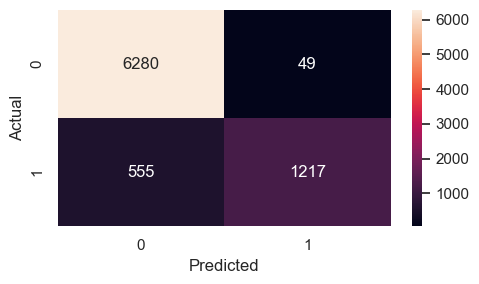

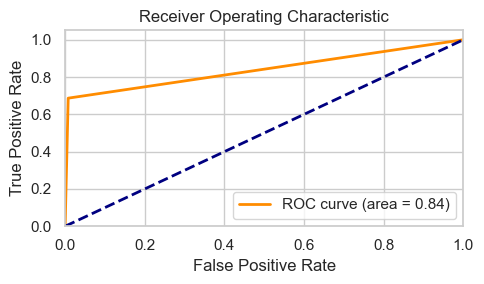

In [97]:
from sklearn.ensemble import RandomForestClassifier

rfc_1 = RandomForestClassifier(class_weight='balanced', criterion='entropy',  max_depth=22, random_state=42)
rfc_1.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc_1.predict(X_test)
print(f" Accuracy on train data: {rfc_1.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc_1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- Random Forest được áp dụng cho dữ liệu trước khi SMOTE cho thấy sự quá khớp (Overfitting) trên dữ liệu đào tạo.
- Sau khi áp dụng SMOTE, mô hình Random Forest cho thấy hiệu suất được cải thiện so với trước khi áp dụng SMOTE, với các số liệu về độ chính xác (Precision) và độ thu hồi (Recall) được cải thiện. Tuy nhiên, vấn đề Overfitting vẫn tồn tại.
- Sử dụng siêu tham số với mô hình Random Forest trên dữ liệu được xử lý bằng SMOTE mang lại kết quả tương tự như mô hình trước đó, với độ chính xác giảm nhẹ trên dữ liệu đào tạo so với dữ liệu thử nghiệm. Tuy nhiên, Overfittinh vẫn là một mối quan tâm.

## 4. Extreme Gradient Boosting

### After Smote

 Accuracy on train data: 0.961518550474547
Accuracy on test_data = 0.931860264164918
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6329
           1       0.95      0.72      0.82      1772

    accuracy                           0.93      8101
   macro avg       0.94      0.86      0.89      8101
weighted avg       0.93      0.93      0.93      8101



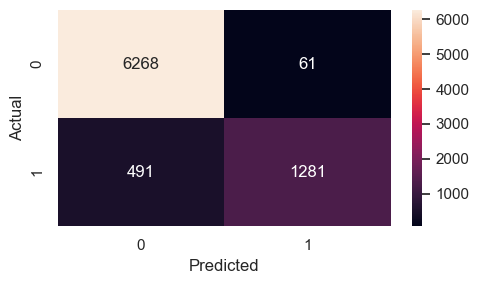

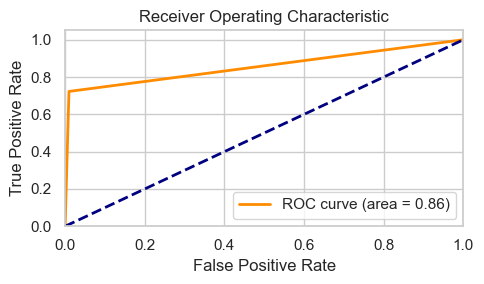

In [98]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

print(f" Accuracy on train data: {xgb.score(X_train_resampled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

 Accuracy on train data: 0.9994429551230721
Accuracy on test_data = 0.9331751186610042
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6251
           1       0.94      0.74      0.83      1755

    accuracy                           0.93      8006
   macro avg       0.94      0.86      0.89      8006
weighted avg       0.93      0.93      0.93      8006



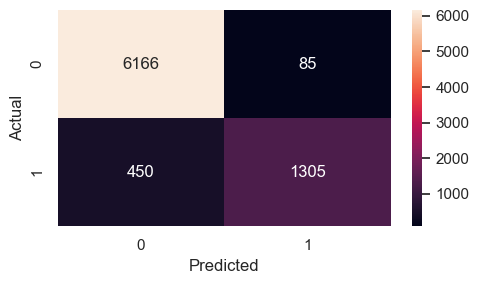

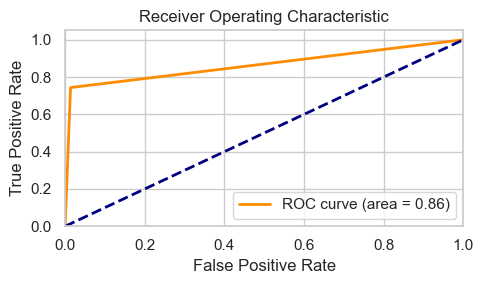

In [81]:
from xgboost import XGBClassifier

xgb_hyp = XGBClassifier(base_score = 0.2, booster = "gbtree", random_state = 15,colsample_bytree =  0.5, n_estimators=500, gamma = 0, min_child_weight = 1, reg_alpha = 1, reg_lambda = 5, max_depth=18, learning_rate = 0.1)
xgb_hyp.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_rsv = xgb_hyp.predict(X_test)

print(f" Accuracy on train data: {xgb_hyp.score(X_train_resampled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb_hyp.score(X_test, y_test)}')
print(classification_report(y_test, y_pred_xgb_rsv))
confusion(y_test, y_pred_xgb_rsv)

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_rsv)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 5. Support Vector Machine

### Before smote

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=100551).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



 Accuracy on train data 0.5356429047301798
 Accuracy on test data 0.5380964276792406
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      6251
           1       0.14      0.21      0.16      1755

    accuracy                           0.54      8006
   macro avg       0.44      0.42      0.42      8006
weighted avg       0.61      0.54      0.57      8006



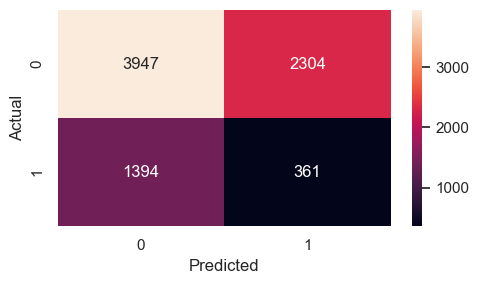

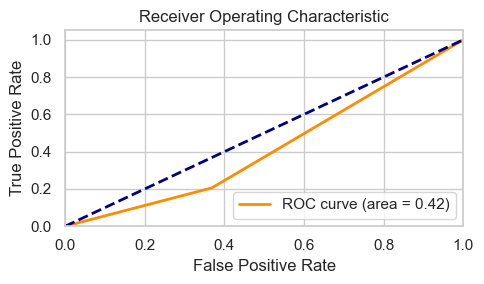

In [76]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train, y_train)

y_pred_svm = svc.predict(X_test)

print(f" Accuracy on train data {svc.score(X_train, y_train)}")
print(f" Accuracy on test data {svc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_svm))
confusion(y_test, y_pred_svm)

# Vẽ ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### After smote

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=100551).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



 Accuracy on train data 0.5420880069025021
 Accuracy on test data 0.21873842735464757
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6329
           1       0.22      1.00      0.36      1772

    accuracy                           0.22      8101
   macro avg       0.11      0.50      0.18      8101
weighted avg       0.05      0.22      0.08      8101



C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



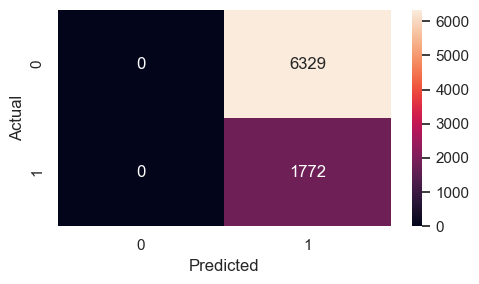

In [89]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train_resampled, y_train_resampled)

y_pred = svc.predict(X_test_scaled)

print(f" Accuracy on train data {svc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data {svc.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

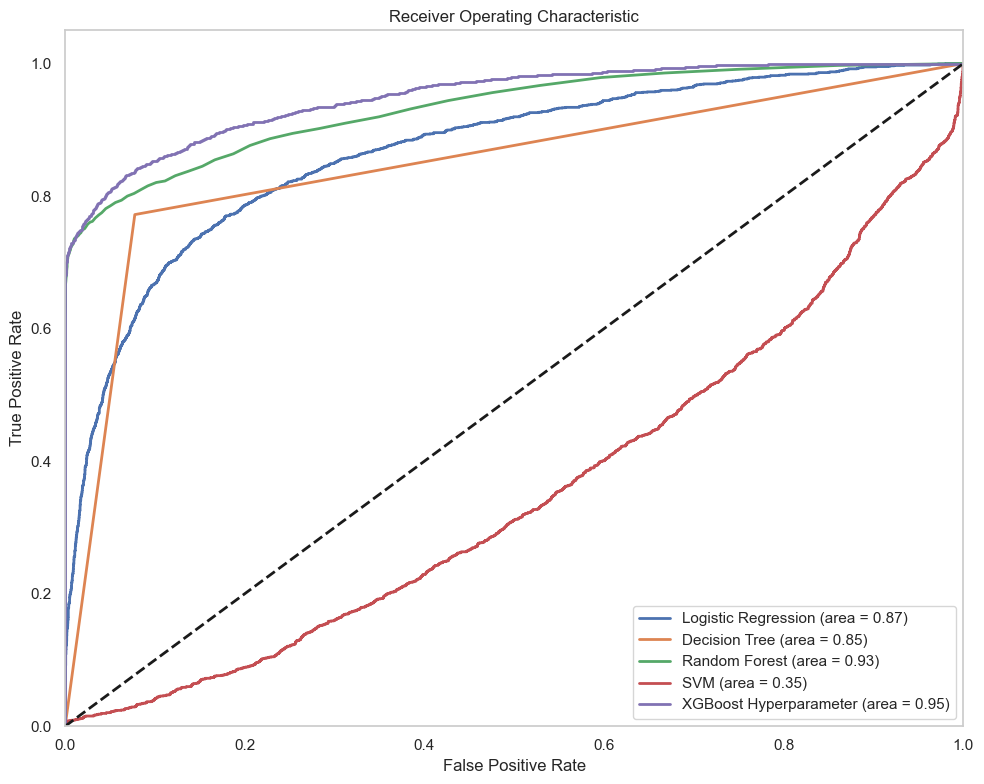

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Định nghĩa hàm vẽ ROC curve
def plot_roc_curves(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))

    for model, name in zip(models, model_names):
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_prob = model.decision_function(X_test)
            # Chuyển đổi decision function thành xác suất
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            y_prob = scaler.fit_transform(y_prob.reshape(-1, 1)).flatten()
        else:
            raise ValueError(f'Model {name} does not support prediction probability.')

        # Tính toán ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Vẽ ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

    # Vẽ đường chéo (random)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Thiết lập các thuộc tính của đồ thị
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Tạo danh sách các mô hình và tên tương ứng
models = [lrg, dtc, rfc, svc, xgb_hyp]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost Hyperparameter']

# Gọi hàm vẽ ROC curves
plot_roc_curves(models, X_test, y_test, model_names)
